# Data analysis for the upcoming test beam (May 2023)


In [1]:
import seaborn as sns
import plotly as plot
import pydose3d
import pandas as pd
import matplotlib.pyplot as plt
import pydose3d.data as data
from pydose3d.svc.ntuple_data import NTupleDataSvc
from pydose3d.svc.dose3d import Dose3DSvc
NTupleDataSvc.ImplicitMT = True
pydose3d.set_log_level("INFO")

Welcome to JupyROOT 6.28/00


## Purpose: Find the barier of the PPMA to be placed before the detector
### We want to shift along the Z-profile to be after the maximum dose point 

Assumpptions: 
* Different density of the PMMA are simulated as the percentage of the original PMMA density:
100%, 75%, 50%
* The barier element (aka bolus) is defined as a box (35 mm x 35 mm x 150 mm) of given material, being placed along side the beam axis (z-axis) at the isocentre. 

In [2]:

data = f"/home/g4rt/test/g4rt/output/2023-09-12/test_cell_voxelization_2.root"
# detector104x104 = f"/home/g4rt/installation_files/dose3d-geant4-linac/output/DetectorSizeValidation/10.4x10.4x2_detector.root"
# detector52x8 = f"/home/g4rt/installation_files/dose3d-geant4-linac/output/2023-05-23/single_file_tompl_run_test_2.root"
# detectorD3D = f"/home/g4rt/installation_files/dose3d-geant4-linac/output/2023-05-23/single_file_tompl_run_test_3.root"


In [3]:
d3dsvc = Dose3DSvc()
d3dsvc.set_data(data,"Dose3DVoxelisedTTree") #This is only tree name (ROOT TTree) in the patient definition used.
df = d3dsvc.get_cell_dose_z_profile_pdframe( MLayer = 1, MColumn = 1, normalized=True)
df = df[["CellPositionZ","Dose"]]
df['scoring'] = 'Cell'

CellIdX
CellIdY
CellIdZ
CellPositionX
CellPositionY
CellPositionZ
CellDose


In [6]:
d3dsvc.set_data(data,"Dose3DVoxelisedTTree") #This is only tree name (ROOT TTree) in the patient definition used.
df2 = d3dsvc.get_voxel_dose_z_profile_pdframe(MLayer = 1, MColumn = 1, CLayer=1, CColumn=1, normalized=True,sum_voxel=True)
df2 = df2[["VoxelPositionZ","Dose"]]
print(df2)
df2['scoring'] = 'Voxel'

CellIdX
CellIdY
CellIdZ
VoxelPositionX
VoxelPositionY
VoxelPositionZ
VoxelDose
VoxelIdX
VoxelIdY
VoxelIdZ


KeyboardInterrupt: 

In [ ]:
df = df.rename(columns={"CellPositionZ":"Z [mm]"})
df2 = df2.rename(columns={"VoxelPositionZ":"Z [mm]"})

pdd = pd.concat([df, df2], ignore_index=True) 

<Axes: xlabel='PosZ[mm]', ylabel='Dose'>

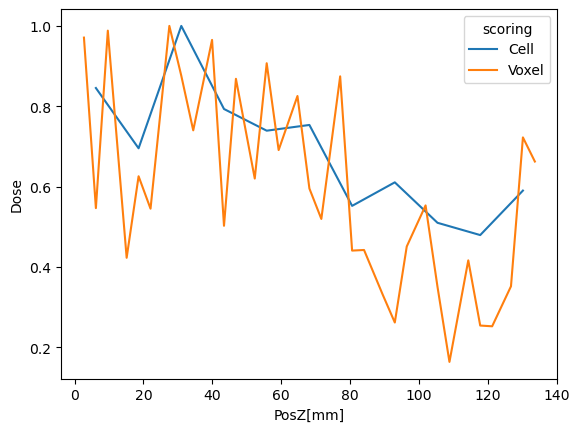

In [ ]:
sns.lineplot(data=pdd,x='Z [mm]',y='Dose',hue='scoring')

In [ ]:
d3dsvc.write_dose_z_profile_to_json( "/home/g4rt/installation_files/pydose3d/pydose3d/data/cokolwiek.json", MLayer = 2, MColumn = 2, CLayer=1, CColumn=1, normalized=True)


         index  VoxelIdY  VoxelIdZ     VoxelDose  CellIdZ  CellIdY   
0            0         0         2  1.275002e-10        2        1  \
1            1         1         0  8.309125e-11        7        2   
2            2         0         2  1.275002e-10        2        1   
3            3         1         0  8.309125e-11        7        2   
4            4         0         2  1.275002e-10        2        1   
...        ...       ...       ...           ...      ...      ...   
270782  270782         0         0  1.755121e-12       10        2   
270783  270783         2         2  6.211263e-11       10        2   
270784  270784         2         1  3.092108e-10        1        1   
270785  270785         0         0  1.755121e-12       10        2   
270786  270786         2         2  6.211263e-11       10        2   

        VoxelPositionZ  VoxelPositionY  VoxelIdX  CellIdX  VoxelPositionX  
0            34.466667       -3.466667         2        1       -2.733333  
1      